# Project: Wrangling and Analyze Data

WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. WeRateDogs has over 4 million followers and has received international media coverage. we will wrangle 3 different data from this account for our analysis.

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv) from udacity.com

In [84]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from functools import reduce
%matplotlib inline

df1 = pd.read_csv('twitter-archive-enhanced-2.csv')


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [ ]:
import requests as req

with req.get(r'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv') as rq:
             with open('image-predictions.tsv', 'wb') as file:
                 file.write(rq.content)

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
import tweepy
import json
from tweepy import OAuthHandler

consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)
fails_dict = {}
tweet_ids = df1.tweet_id.values
count = 0

with open('tweet_json.txt', 'w') as outfile:
    # loop to get each id in df1
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')#writes a json in newline 
        except Exception as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
        
print(fails_dict)

In [26]:
import json
#creating dataframe  
tweet_df = []
with open('tweet_json.txt', 'r') as fh:
    for line in fh:
        tweets = json.loads(line)
        tweet_id = tweets['id']
        created_at = tweets['created_at']
        favorite_count = tweets['favorite_count']
        retweet_count = tweets['retweet_count']

    
        tweet_df.append({'tweet_id':tweet_id,
                       'created_at':created_at,
                       'favorite_count':favorite_count,
                       'retweet_count':retweet_count})
df3 = pd.DataFrame(tweet_df, columns = ['tweet_id', 'created_at', 'favorite_count', 'retweet_count'])


In [27]:
df2 = pd.read_csv("image-predictions.tsv",sep="\t")

## Assessing Data

In [28]:
df1.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2127,670319130621435904,NaN,NaN,2015-11-27 19:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",AT DAWN...\nWE RIDE\n\n11/10 https://t.co/QnfO...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670319130...,11,10,None,None,None,None,None
512,811744202451197953,NaN,NaN,2016-12-22 01:24:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Halo. She likes watermelon. 13/10 http...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/811744202...,13,10,Halo,None,None,None,None
2164,669371483794317312,NaN,NaN,2015-11-25 04:26:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oliviér. He's a Baptist Hindquarter. A...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669371483...,10,10,Oliviér,None,None,None,None
835,768193404517830656,NaN,NaN,2016-08-23 21:09:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Gerald. He's a fairly exotic doggo. Floof...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/768193404...,8,10,Gerald,doggo,None,None,None
1136,728387165835677696,NaN,NaN,2016-05-06 00:53:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Enchilada (yes, that's her real name)....",NaN,NaN,NaN,https://twitter.com/dog_rates/status/728387165...,12,10,Enchilada,None,None,None,None
1820,676588346097852417,NaN,NaN,2015-12-15 02:23:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bubbles. He kinda resembles a fish. Al...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676588346...,5,10,Bubbles,None,None,None,None
1072,739979191639244800,NaN,NaN,2016-06-07 00:36:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Nollie. She's waving at you. If you do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/739979191...,12,10,Nollie,None,None,None,None
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
2121,670408998013820928,NaN,NaN,2015-11-28 01:08:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Peanut. He was the World Table Tennis ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670408998...,10,10,Peanut,None,None,None,None
2244,667886921285246976,NaN,NaN,2015-11-21 02:07:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Erik. He's fucken massive. But also ki...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667886921...,11,10,Erik,None,None,None,None


In [29]:
df2.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
503,675878199931371520,https://pbs.twimg.com/media/CWEzo19WoAEiOCj.jpg,1,wood_rabbit,0.785756,False,hare,0.118181,False,Cardigan,0.043627,True
1875,845677943972139009,https://pbs.twimg.com/media/C7xzmngWkAAAp9C.jpg,1,chow,0.808681,True,groenendael,0.123141,True,Newfoundland,0.022143,True
1044,712717840512598017,https://pbs.twimg.com/media/CeQVF1eVIAAJaTv.jpg,1,Great_Pyrenees,0.732043,True,kuvasz,0.121375,True,Irish_wolfhound,0.049524,True
1923,857029823797047296,https://pbs.twimg.com/media/C-TIEwMW0AEjb55.jpg,2,golden_retriever,0.968623,True,Labrador_retriever,0.010325,True,Saluki,0.004148,True
129,668286279830867968,https://pbs.twimg.com/media/CUY60usWoAAdBxx.jpg,1,golden_retriever,0.215944,True,basset,0.189214,True,Cardigan,0.113010,True
567,678341075375947776,https://pbs.twimg.com/media/CWnznDTU4AAa-6P.jpg,1,golden_retriever,0.853284,True,cocker_spaniel,0.026230,True,Labrador_retriever,0.024123,True
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
1220,743980027717509120,https://pbs.twimg.com/media/ClMl4VLUYAA5qBb.jpg,1,bull_mastiff,0.975730,True,Rhodesian_ridgeback,0.008073,True,pug,0.005571,True
61,667152164079423490,https://pbs.twimg.com/media/CUIzWk_UwAAfUNq.jpg,1,toy_poodle,0.535411,True,Pomeranian,0.087544,True,miniature_poodle,0.062050,True
1737,821886076407029760,https://pbs.twimg.com/media/C2ftAxnWIAEUdAR.jpg,1,golden_retriever,0.266238,True,cocker_spaniel,0.223325,True,Irish_setter,0.151631,True


In [30]:
df3.sample(10)

,tweet_id,created_at,favorite_count,retweet_count
1380,699072405256409088,Mon Feb 15 03:27:04 +0000 2016,2710,1076
323,832273440279240704,Thu Feb 16 17:00:25 +0000 2017,10630,2139
236,845397057150107648,Fri Mar 24 22:08:59 +0000 2017,7075,1616
1719,679062614270468097,Mon Dec 21 22:15:18 +0000 2015,15443,7180
1689,680191257256136705,Fri Dec 25 01:00:07 +0000 2015,1972,440
1127,724983749226668032,Tue Apr 26 15:29:30 +0000 2016,3436,1165
1633,683030066213818368,Fri Jan 01 21:00:32 +0000 2016,1995,666
2267,667090893657276420,Wed Nov 18 21:23:57 +0000 2015,286,105
81,876838120628539392,Mon Jun 19 16:24:33 +0000 2017,18167,2795
1644,682389078323662849,Thu Dec 31 02:33:29 +0000 2015,1535,423


In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [32]:
df1.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [33]:
df1.duplicated().sum()

0

In [34]:
print(df2.isnull().sum())

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64


In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


In [36]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2327 non-null   int64 
 1   created_at      2327 non-null   object
 2   favorite_count  2327 non-null   int64 
 3   retweet_count   2327 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 63.7+ KB


In [37]:
df3.isnull().sum()

tweet_id          0
created_at        0
favorite_count    0
retweet_count     0
dtype: int64

### Quality issues
1.Missing names in df1's name column

2.wrong data type of df1's timestamp column

3.Null values in df1's expanded_url column

4.wrong date type on df3's created_at column

5.Null values in df1's in_reply_to_status_id and in_reply_to_user_id columns

6.Bad datatype for tweet_id in df1

7.Bad column names in df1

8.Bad datatype for tweet_id in df2 and df3

### Tidiness issues
1. the dog stage is one variable and hence should form single column. But this variable is spread across 4 columns - doggo, floofer, pupper, puppo.

2. Information about one type of observational unit (tweets) is spread across three different files/dataframes. 

## Cleaning Data

In [38]:
# Making copies of original pieces of data
df1_copy = df1.copy()
df2_copy = df2.copy()
df3_copy = df3.copy()

In [39]:
df1['name'].dropna(inplace=True)

In [40]:
df1['timestamp'] = pd.to_datetime(df1['timestamp'])#changing datatype of timestamp in df1 to datetime

In [41]:
df1['expanded_urls'].dropna(inplace=True)#dropping null values in expanded_urls column in df1

In [42]:
df3['created_at'] = pd.to_datetime(df3['created_at'])#changing datatype of created_at to datetime

In [46]:
df1.rename({'text': 'about_dog'}, axis='columns', inplace=True)#renaming text column of df1

In [45]:
df1.drop(['in_reply_to_status_id','in_reply_to_user_id'], axis=1, inplace=True)#droping in_reply_to_user_id and in_reply_to_status_id 

In [47]:
df1 = df1.astype({'tweet_id':str})#changing datatypes of df1, df2 and df3
df2 = df2.astype({'tweet_id':str})
df3 = df3.astype({'tweet_id':str})

### Issue #1:

#### Define: 

the dog stage is one variable and hence should form single column. But this variable is spread across 4 columns - doggo, floofer, pupper, puppo.

#### Code:

In [48]:
df1.doggo.replace('None', '', inplace=True)  # replaceing None with empty str for all four dog stages
df1.floofer.replace('None', '', inplace=True)
df1.pupper.replace('None', '', inplace=True)
df1.puppo.replace('None', '', inplace=True)

# Then combiningcolumns to a single stage columns.
df1['stage'] = df1.doggo + df1.floofer + df1.pupper + df1.puppo

# formating entries with multiple dog stages which appeared like doggopupper.
df1.loc[df1.stage == 'doggopupper', 'stage'] = 'doggo, pupper' 
df1.loc[df1.stage == 'doggopuppo', 'stage'] = 'doggo, puppo' 
df1.loc[df1.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'

In [49]:
df1.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [50]:
a = ('doggo', 'floofer', 'pupper', 'puppo') #confirming that values in variable is not in df1 columns
assert a not in df1.columns

In [51]:
df1.stage.value_counts()

                  1976
pupper             245
doggo               83
puppo               29
doggo, pupper       12
floofer              9
doggo, puppo         1
doggo, floofer       1
Name: stage, dtype: int64

### Issue #2:

#### Define: 

Information about one type of observational unit (tweets) is spread across three different files/dataframes.

#### Code

In [52]:
#checking for number of retweets in about_dog column
count = 0
for i in df1.about_dog:
    if "RT @" in i:
        count+=1
        
print(count)

181


In [53]:
df1[~df1.about_dog.str.contains("RT @")]

,tweet_id,timestamp,source,about_dog,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,
...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,
2352,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,
2353,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,
2354,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,


In [54]:
df1 = df1[df1.retweeted_status_id.isnull()]
df1 = df1[df1.retweeted_status_user_id.isnull()]
df1 = df1[df1.retweeted_status_timestamp.isnull()]

In [55]:
df1.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)


#### Test

In [56]:
b = ('retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp')
assert b not in df1.columns
assert "RT @" not in df1.about_dog

In [57]:
#confirming if there is still any retweets
count = 0
for i in df1.about_dog:
    if "RT @" in i:
        count+=1
        
print(count)

0


In [58]:
df1.columns

Index(['tweet_id', 'timestamp', 'source', 'about_dog', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'stage'],
      dtype='object')

## Storing Data
Saving gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [59]:
data = [df1, df2, df3]#merging the three dataframes
df = reduce(lambda left, right: pd.merge(left, right, on=['tweet_id']), data)
df.head()

,tweet_id,timestamp,source,about_dog,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,created_at,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,False,bagel,0.085851,False,banana,0.076110,False,2017-08-01 16:23:56+00:00,33698,6970
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,True,Pekinese,0.090647,True,papillon,0.068957,True,2017-08-01 00:17:27+00:00,29225,5272
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,True,malamute,0.078253,True,kelpie,0.031379,True,2017-07-31 00:18:03+00:00,21978,3464
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,2017-07-30 15:58:51+00:00,36793,7191
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,2017-07-29 16:00:24+00:00,35185,7718


In [60]:
df.to_csv("twitter_archive_master.csv", index=False)

## Analyzing and Visualizing Data

In [61]:

df_clean = pd.read_csv('twitter_archive_master.csv')
df_clean.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count
count,1.986000e+03,1986.000000,1986.000000,1986.000000,1986.000000,1.986000e+03,1.986000e+03,1986.000000,1986.000000
mean,7.356142e+17,12.281974,10.534240,1.203424,0.593452,1.344853e-01,6.034994e-02,7680.720544,2232.468278
std,6.740686e+16,41.581180,7.335369,0.561492,0.271961,1.005944e-01,5.091948e-02,11331.489092,3998.968171
min,6.660209e+17,0.000000,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,66.000000,11.000000
25%,6.758214e+17,10.000000,10.000000,1.000000,0.362656,5.407533e-02,1.624755e-02,1631.750000,493.250000
50%,7.082494e+17,11.000000,10.000000,1.000000,0.587357,1.175370e-01,4.952715e-02,3445.500000,1076.500000
75%,7.873791e+17,12.000000,10.000000,1.000000,0.844920,1.951377e-01,9.166433e-02,9511.500000,2542.250000
max,8.924206e+17,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,144256.000000,70335.000000


In [62]:
df.groupby('p1').mean().favorite_count

p1
Afghan_hound           14659.000000
African_crocodile        808.000000
African_grey            4492.000000
African_hunting_dog     1455.000000
Airedale                4477.083333
                           ...     
wombat                  6460.750000
wood_rabbit             2111.333333
wooden_spoon           13878.000000
wool                    1578.000000
zebra                   1277.000000
Name: favorite_count, Length: 374, dtype: float64

In [63]:
df.groupby('p2').mean().favorite_count

p2
Afghan_hound                      12254.600000
African_hunting_dog                 393.000000
Airedale                           5005.142857
American_Staffordshire_terrier    11477.157895
American_alligator                  787.000000
                                      ...     
window_screen                      9086.250000
window_shade                       4171.000000
wire-haired_fox_terrier            3156.000000
wombat                             2366.000000
wood_rabbit                        1018.000000
Name: favorite_count, Length: 401, dtype: float64

In [78]:
df.groupby('stage').mean().rating_numerator

stage
                  12.498513
doggo             11.870968
doggo, floofer    11.000000
doggo, pupper     11.000000
doggo, puppo      13.000000
floofer           12.000000
pupper            10.714286
puppo             12.000000
Name: rating_numerator, dtype: float64

In [79]:
df.groupby('stage').mean().favorite_count

stage
                   7281.455681
doggo             17533.209677
doggo, floofer    14800.000000
doggo, pupper     11995.888889
doggo, puppo      41813.000000
floofer           11180.142857
pupper             6181.187192
puppo             19504.863636
Name: favorite_count, dtype: float64

In [66]:
df.describe().favorite_count

count      1986.000000
mean       7680.720544
std       11331.489092
min          66.000000
25%        1631.750000
50%        3445.500000
75%        9511.500000
max      144256.000000
Name: favorite_count, dtype: float64

### Insights:
1. it seems there is a correlation between favorite_count and retweet_count the higher the favorite_count, the higher the retweet_count

2. dogs from p1 category recieved more ratings, favourite_count and retweet_count

3. most dog numerator ratings are in doggo, puppo stage

4. doggo, puppo stage of dogs have the most favorite count

### Visualization

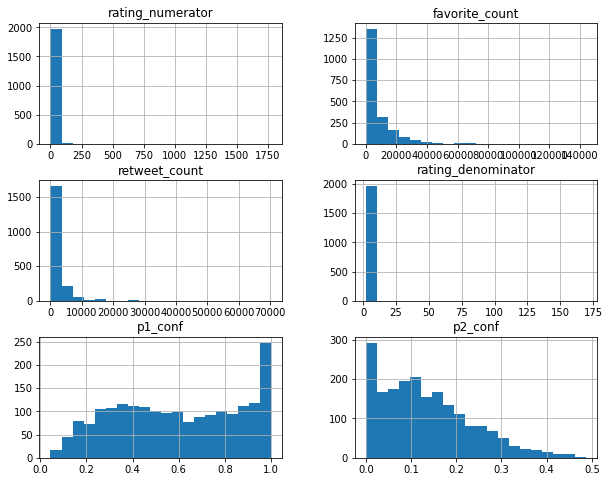

In [87]:
df_clean[['rating_numerator', 'favorite_count','retweet_count', 'rating_denominator', 'p1_conf','p2_conf']].hist(figsize=(10,8), bins=20);

##### A histogram showing the the distribution of rating_numerator, favorite_count, retweet_count, rating_denominator, p1_conf and p2_conf

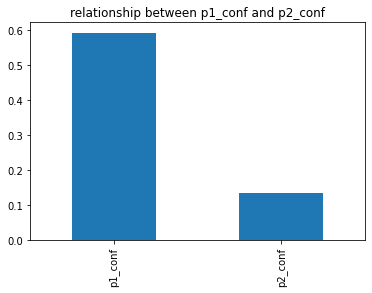

In [68]:
df_clean[['p1_conf','p2_conf']].mean().plot(kind='bar', title='relationship between p1_conf and p2_conf');

#### A bar chart showing  the mean distribution of p1_conf and p2_conf

In [83]:
# is rating_numerator associated with favorite_count?

[Text(0.5, 1.0, 'relationship between rating_numerator and favorite_count')]

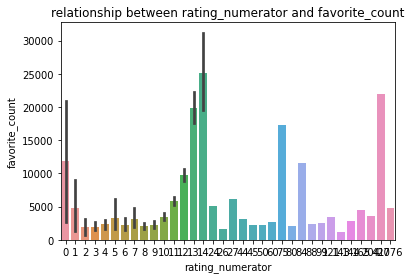

In [69]:
sns.barplot(x='rating_numerator', y='favorite_count', data=df_clean).set(title='relationship between rating_numerator and favorite_count')

#### A bar chart showing the correlation between rating_numerator and favorite_count

[Text(0.5, 1.0, 'relationship between retweet_count and favorite_count')]

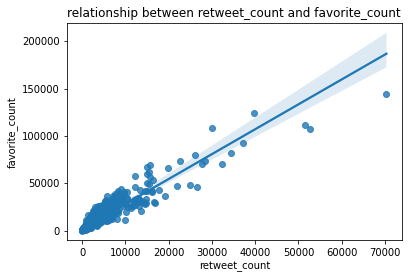

In [70]:
sns.regplot(x='retweet_count', y='favorite_count', data=df_clean).set(title='relationship between retweet_count and favorite_count')

#### A reg or scatter plot showing the correlation between retweet_count and favorite_count

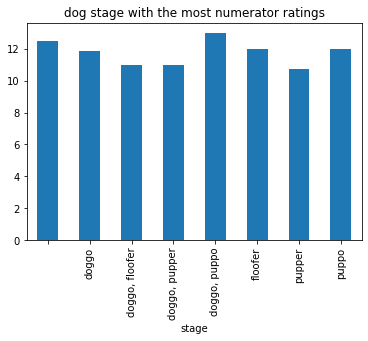

In [81]:
df.groupby('stage').mean().rating_numerator.plot(kind='bar', title='dog stage with the most numerator ratings');

#### The bar chart shows the dog stage with the highest average numerator ratings

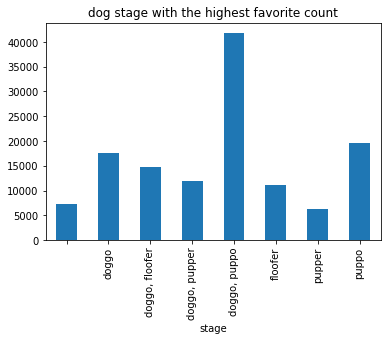

In [82]:
df.groupby('stage').mean().favorite_count.plot(kind='bar', title='dog stage with the highest favorite count');

#### A bar chart showing the the dog stage which has the most average favorite count